PHASE 2 - Data Visualization and Analysis

In this phase, we performed an extensive exploratory data analysis using various visualizations to derive insights into customer behavior and spending patterns. Key highlights include the analysis of gender distribution, age-wise spending, city category trends, and purchase behavior across different product categories. Additionally, we explored correlations between numerical features to identify relationships between spending patterns and demographic/product-specific variables.
These visualizations and analyses helped us uncover trends such as the influence of age, city category, and spending segments on purchase behavior. The observations provide a foundation for deeper statistical modeling and strategic recommendations in subsequent phases.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('/content/train.csv')

# Overview of the dataset
print("Dataset Information:")
print(df.info())
print("\nFirst 5 rows of the dataset:")
print(df.head())
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50

In [ ]:
# Fill missing values in product categories
# Fill missing values in Product_Category_2 and Product_Category_3
df['Product_Category_2'].fillna(-1, inplace=True)  # Use -1 to mark missing values
df['Product_Category_3'].fillna(-1, inplace=True)

# Map Gender column
if 'Gender' in df.columns:
    print("Handling 'Gender' column...")
    df['Gender'] = df['Gender'].map({'F': 0, 'M': 1})
    print("Unique values in 'Gender' after mapping:", df['Gender'].unique())

# Map Age column
if 'Age' in df.columns:
    print("Handling 'Age' column...")
    age_mapping = {'0-17': 1, '18-25': 2, '26-35': 3, '36-45': 4, '46-50': 5, '51-55': 6, '55+': 7}
    df['Age'] = df['Age'].map(age_mapping)
    print("Unique values in 'Age' after mapping:", df['Age'].unique())

# Map City_Category column
if 'City_Category' in df.columns:
    print("Handling 'City_Category' column...")
    city_mapping = {'A': 1, 'B': 2, 'C': 3}
    df['City_Category'] = df['City_Category'].map(city_mapping)
    print("Unique values in 'City_Category' after mapping:", df['City_Category'].unique())

# Handle Stay_In_Current_City_Years column
if 'Stay_In_Current_City_Years' in df.columns:
    print("Handling 'Stay_In_Current_City_Years' column...")
    df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace('4+', 4).astype(int)
    print("Unique values in 'Stay_In_Current_City_Years':", df['Stay_In_Current_City_Years'].unique())


# Check for successful cleaning
print("\nUnique values after cleaning:")
print("Gender:", df['Gender'].unique())
print("Age:", df['Age'].unique())
print("City_Category:", df['City_Category'].unique())
print("Stay_In_Current_City_Years:", df['Stay_In_Current_City_Years'].unique())


Handling 'Gender' column...
Unique values in 'Gender' after mapping: [0 1]
Handling 'Age' column...
Unique values in 'Age' after mapping: [1 7 3 5 6 4 2]
Handling 'City_Category' column...


<ipython-input-2-08350470f9fd>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Product_Category_2'].fillna(-1, inplace=True)  # Use -1 to mark missing values
<ipython-input-2-08350470f9fd>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

Unique values in 'City_Category' after mapping: [1 3 2]
Handling 'Stay_In_Current_City_Years' column...
Unique values in 'Stay_In_Current_City_Years': [2 4 3 1 0]

Unique values after cleaning:
Gender: [0 1]
Age: [1 7 3 5 6 4 2]
City_Category: [1 3 2]
Stay_In_Current_City_Years: [2 4 3 1 0]


In [ ]:
# Add a feature for total number of product categories purchased
df['Total_Product_Categories'] = df[['Product_Category_1', 'Product_Category_2', 'Product_Category_3']].nunique(axis=1)

# Add features for high and low spending segments
df['High_Spending_Segment'] = (df['Purchase'] > 15000).astype(int)
df['Low_Spending_Segment'] = (df['Purchase'] < 5000).astype(int)

# Normalize purchase amounts
scaler = StandardScaler()
df['Normalized_Purchase'] = scaler.fit_transform(df[['Purchase']])

# Verify engineered features
print("\nFeature engineering completed. Sample of new features:")
print(df[['Total_Product_Categories', 'High_Spending_Segment', 'Low_Spending_Segment', 'Normalized_Purchase']].head())



Feature engineering completed. Sample of new features:
   Total_Product_Categories  High_Spending_Segment  Low_Spending_Segment  \
0                         2                      0                     0   
1                         3                      1                     0   
2                         2                      0                     1   
3                         3                      0                     1   
4                         2                      0                     0   

   Normalized_Purchase  
0            -0.177973  
1             1.181756  
2            -1.561193  
3            -1.633858  
4            -0.257805  


In [ ]:
# Aggregate spending per user
user_spending = df.groupby('User_ID')['Purchase'].sum().reset_index()
user_spending.columns = ['User_ID', 'Total_Spending']

# Merge aggregated data back into the main dataframe
df = pd.merge(df, user_spending, on='User_ID', how='left')

# Verify integration
print("\nSample of integrated data:")
print(df[['User_ID', 'Purchase', 'Total_Spending']].head())



Sample of integrated data:
   User_ID  Purchase  Total_Spending
0  1000001      8370          334093
1  1000001     15200          334093
2  1000001      1422          334093
3  1000001      1057          334093
4  1000002      7969          810472


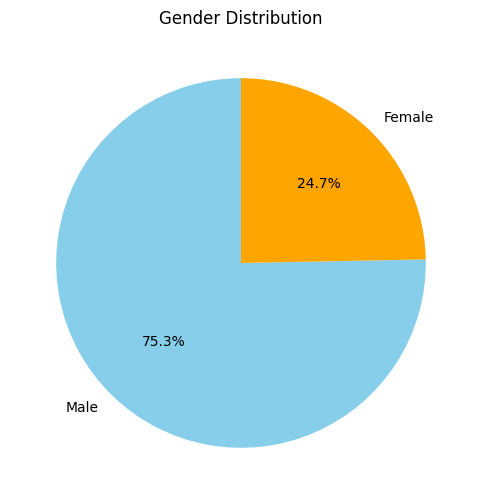

In [ ]:
# Gender distribution pie chart
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'], labels=['Male', 'Female'])
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()


The dataset reveals a significant gender imbalance, with males accounting for 75.3% of the customers and females representing 24.7%. This suggests that marketing or purchase trends might be skewed more towards male customers

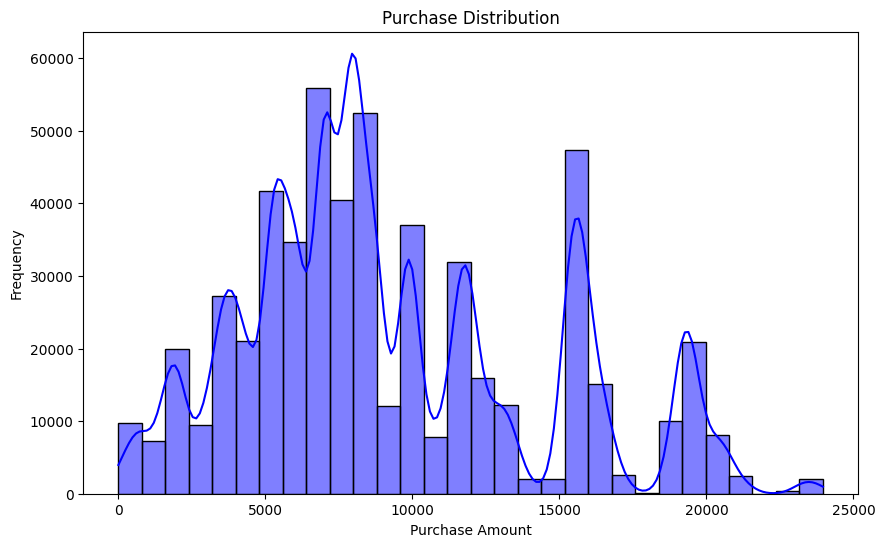

In [ ]:
# Distribution of Purchase amounts
plt.figure(figsize=(10, 6))
sns.histplot(df['Purchase'], bins=30, kde=True, color='blue')
plt.title('Purchase Distribution')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()


The purchase distribution shows that most customers tend to make purchases in the range of 5,000 to 15,000, with peaks around 8,000 and 15,000. However, there are occasional spikes at higher purchase amounts, indicating some outliers or high-value transactions. This suggests the dataset has a mix of regular and high-value customers.

<ipython-input-8-e3aacc4063d1>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Age', y='Purchase', ci=None, palette='viridis')
<ipython-input-8-e3aacc4063d1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Age', y='Purchase', ci=None, palette='viridis')


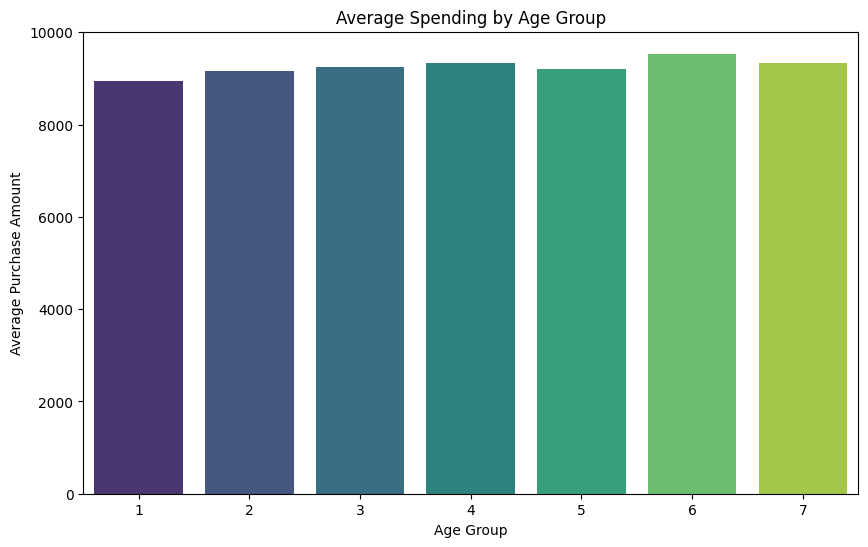

In [ ]:
# Spending by age group
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Age', y='Purchase', ci=None, palette='viridis')
plt.title('Average Spending by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Purchase Amount')
plt.show()


The average spending across all age groups is fairly consistent, with slight increases in older age groups (6 and 7). This suggests that purchasing power or spending habits do not vary drastically by age, but older customers may have a marginally higher average spending

<ipython-input-9-32446960eeb5>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='City_Category', y='Purchase', ci=None, palette='viridis')
<ipython-input-9-32446960eeb5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='City_Category', y='Purchase', ci=None, palette='viridis')


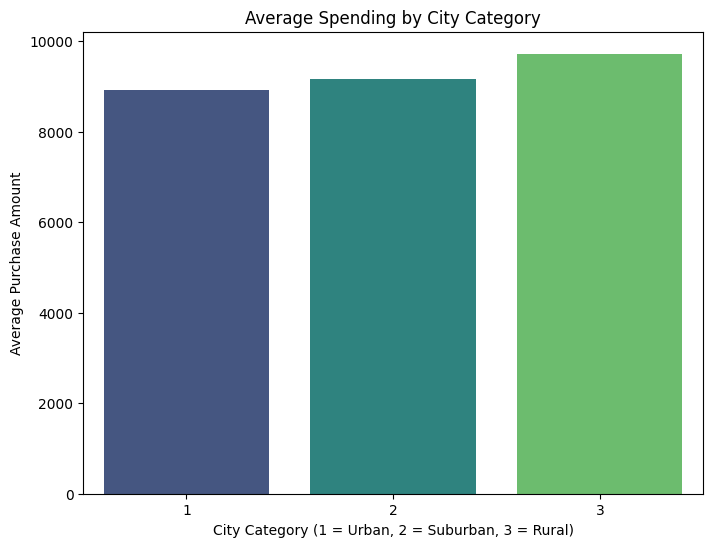

In [ ]:
# Spending by city category
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='City_Category', y='Purchase', ci=None, palette='viridis')
plt.title('Average Spending by City Category')
plt.xlabel('City Category (1 = Urban, 2 = Suburban, 3 = Rural)')
plt.ylabel('Average Purchase Amount')
plt.show()


The average spending is highest in rural areas (City Category 3) compared to urban (Category 1) and suburban (Category 2) regions. This trend suggests that rural customers might contribute more significantly to purchase values, potentially indicating targeted marketing opportunities in these areas

<ipython-input-14-8a5594c4f818>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Age', y='Purchase', hue='Gender', ci=None, palette='viridis')


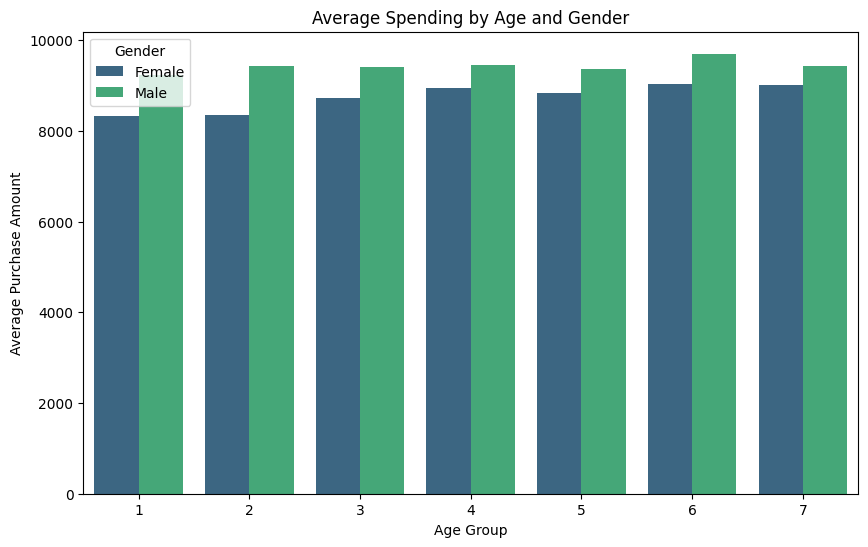

In [ ]:
# Spending by age and gender
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Age', y='Purchase', hue='Gender', ci=None, palette='viridis')
plt.title('Average Spending by Age and Gender')
plt.xlabel('Age Group')
plt.ylabel('Average Purchase Amount')
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.show()


While males generally spend more than females across all age groups, the gap narrows as age increases. In older age groups, such as 6 and 7, female spending closely matches male spending, indicating a shift in purchasing behavior among older customers.

<ipython-input-15-8be1b5d867eb>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='City_Category', y='Purchase', hue='Marital_Status', ci=None, palette='magma')


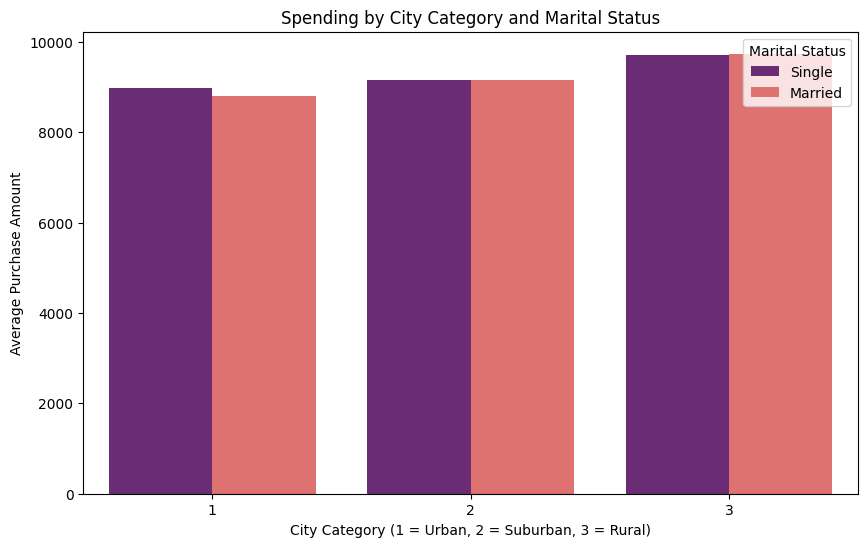

In [ ]:
# Spending by city category and marital status
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='City_Category', y='Purchase', hue='Marital_Status', ci=None, palette='magma')
plt.title('Spending by City Category and Marital Status')
plt.xlabel('City Category (1 = Urban, 2 = Suburban, 3 = Rural)')
plt.ylabel('Average Purchase Amount')
plt.legend(title='Marital Status', labels=['Single', 'Married'])
plt.show()


In urban cities (City Category 1), single customers spend slightly more than their married counterparts, which could reflect lifestyle differences and potentially the impact of loneliness or social habits in urban settings. This trend is not as pronounced in suburban or rural areas.

<ipython-input-16-b11a69d2f724>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stay_purchase.index, y=stay_purchase.values, palette='coolwarm')


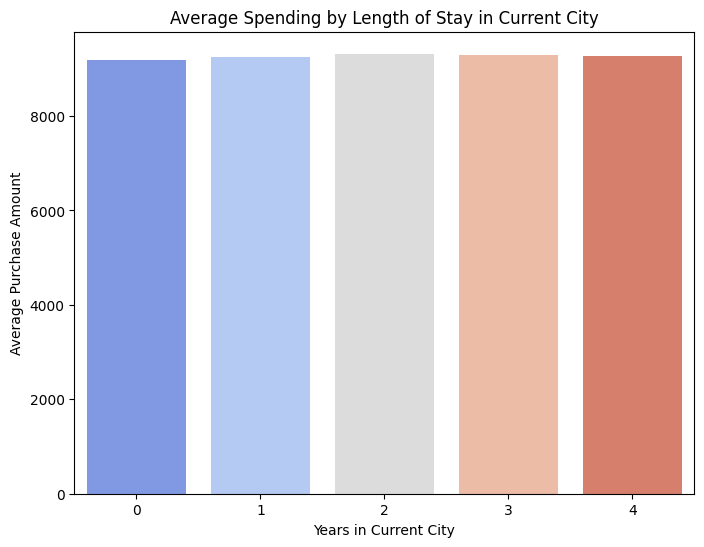

In [ ]:
# Purchase frequency by stay in current city
stay_purchase = df.groupby('Stay_In_Current_City_Years')['Purchase'].mean()
plt.figure(figsize=(8, 6))
sns.barplot(x=stay_purchase.index, y=stay_purchase.values, palette='coolwarm')
plt.title('Average Spending by Length of Stay in Current City')
plt.xlabel('Years in Current City')
plt.ylabel('Average Purchase Amount')
plt.show()


The average spending slightly increases with the length of stay in the current city. Customers who have lived in a city for 3–4 years spend more on average, possibly indicating a sense of stability or increased familiarity with local shopping options. However, the difference across years is minimal, suggesting length of stay has a modest impact on spending.

<ipython-input-18-553219fbe27a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_users.index.astype(str), y=top_users.values, palette='viridis')


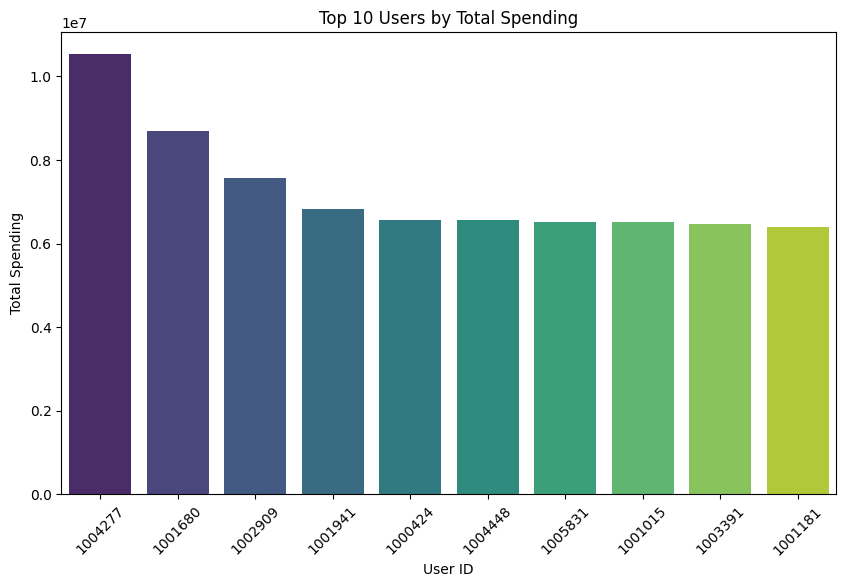

In [ ]:
# Top 10 users by total spending
top_users = df.groupby('User_ID')['Purchase'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_users.index.astype(str), y=top_users.values, palette='viridis')
plt.title('Top 10 Users by Total Spending')
plt.xlabel('User ID')
plt.ylabel('Total Spending')
plt.xticks(rotation=45)
plt.show()


The top 10 users by total spending contribute significantly, with the highest spender (User ID 1004277) spending over 10 million units. This indicates a highly skewed distribution of spending, where a small group of users accounts for a disproportionate share of the total purchases. These high-value customers might be ideal targets for personalized marketing campaigns or loyalty programs.

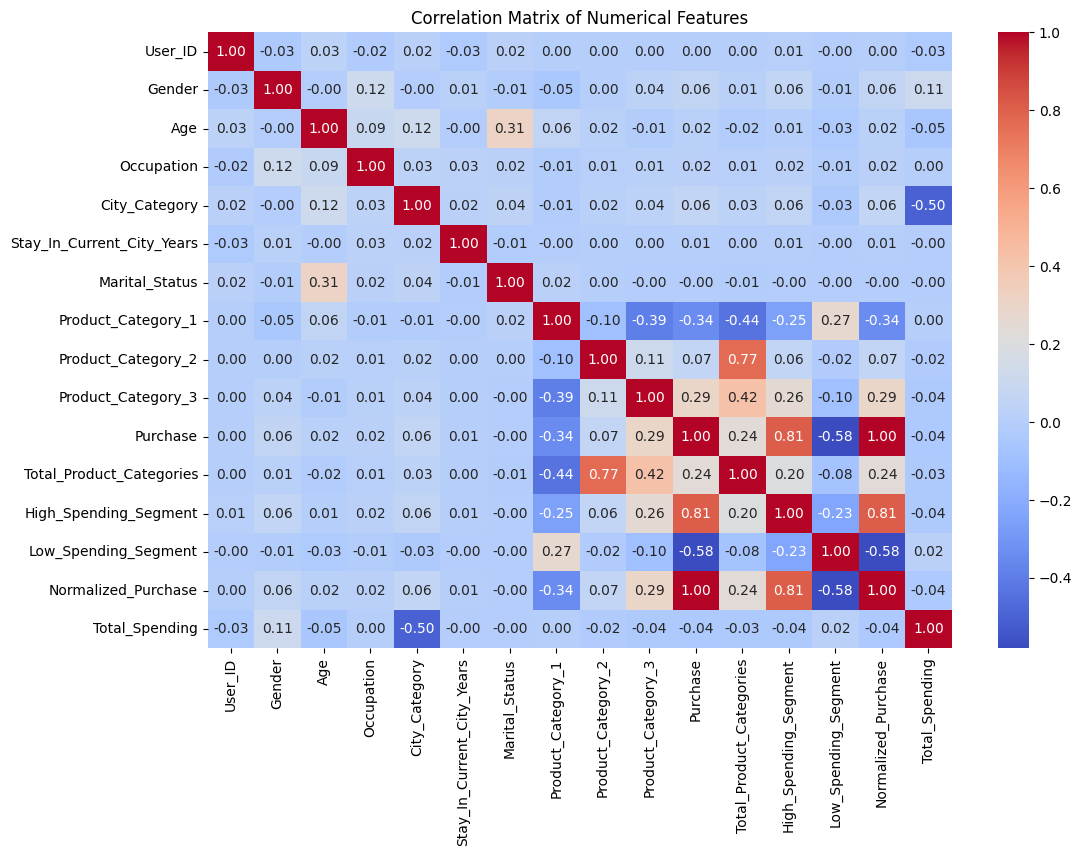

In [ ]:
# Correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])  # Filter numeric columns
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


The matrix reveals a strong relationship between product categories, particularly between Product_Category_1 and Total_Product_Categories, indicating that customers purchasing in one category often buy across others. Spending segments also show notable trends, with high spenders contributing more to purchase amounts and low spenders having a clear inverse relationship. These correlations emphasize the importance of product-related features over demographics in driving spending behavior.
Demographic features like Gender, Age, and Marital_Status have weak correlations with spending, suggesting they play a limited role in influencing purchases. Urban areas appear to correlate negatively with total spending, hinting at higher contributions from rural or suburban customers. Overall, the insights highlight the dominance of purchase-related factors in shaping customer behavior.

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score
from sklearn.preprocessing import LabelEncoder

X = df.drop(columns=['High_Spending_Segment', 'Low_Spending_Segment', 'User_ID', 'Purchase',
                     'Normalized_Purchase', 'Total_Spending'])  # Drop irrelevant features
y = df['High_Spending_Segment']


label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le

# Handle missing values by filling with the median
X = X.fillna(X.median())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from xgboost import XGBClassifier


xgb_clf = XGBClassifier(random_state=42, scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]))
xgb_clf.fit(X_train, y_train)


y_pred_xgb = xgb_clf.predict(X_test)

# Calculate the F1 score
f1_xgb = f1_score(y_test, y_pred_xgb)
print(f"XGBoost F1 Score: {f1_xgb:.2f}")

# Display classification report
print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))



XGBoost F1 Score: 0.72

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.82      0.90     88058
           1       0.58      0.98      0.72     21956

    accuracy                           0.85    110014
   macro avg       0.78      0.90      0.81    110014
weighted avg       0.91      0.85      0.86    110014




XGBoost achieves an F1 score of 0.72 for the minority class, driven by its high recall of 0.98, indicating strong sensitivity to identifying high spenders. While precision for the minority class is moderate at 0.58, the model captures most positive cases effectively. The overall accuracy of 85% and a macro average F1 score of 0.81 highlight the model's balanced performance across both classes.